# Series de Tiempo - Carbono 🏭🌳🇲🇽

**Equipo**: Austral 21 🧊🐧

**Objetivo**: A través de un modelo ARIMA (Auto Regressive Moving Average) detectar patrones de tendencias y ciclos para pronosticar los niveles de la variable de interés a través del tiempo. 🎯

In [1]:
# Importando librerías
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

______________________________________________________________________________

**NOTA AL EQUIPO!!!:** LA SIGUIENTE LÍNEA ES SÓLO PARA EXTRAER DATOS SINTÉTICOS, ESTA PARTE DEBERÍA SER SUSTITUÍDA POR LA IMPORTACIÓN DE NUESTRA BASE A ANALIZAR.

In [2]:
#!pip install pandas_datareader requests
import pandas_datareader as pdr
 
# Reading Apple shares from yahoo finance server    
db = pdr.DataReader('AAPL', 'yahoo', start='2020-07-01', end='2022-07-31')

# Look at the data read
db = pd.DataFrame(db, columns = ["Close"])

db.describe()

,Close
count,519.000000
mean,139.187442
std,20.724277
min,91.027496
25%,124.325001
50%,137.440002
75%,151.945000
max,182.009995


In [3]:
# Cambiando el formato
db = db.reset_index()
db["Date"] = db["Date"].astype("datetime64")
db = db.set_index("Date")
db = db.groupby(pd.Grouper(freq='M')).mean()
db

,Close
Date,
2020-07-31,95.566250
2020-08-31,117.299762
2020-09-30,115.125237
2020-10-31,116.413182
2020-11-30,116.825999
2020-12-31,127.290455
2021-01-31,133.036842
2021-02-28,131.531579
2021-03-31,121.871304


______________________________________________________________________________

### Visualización de serie de tiempo:

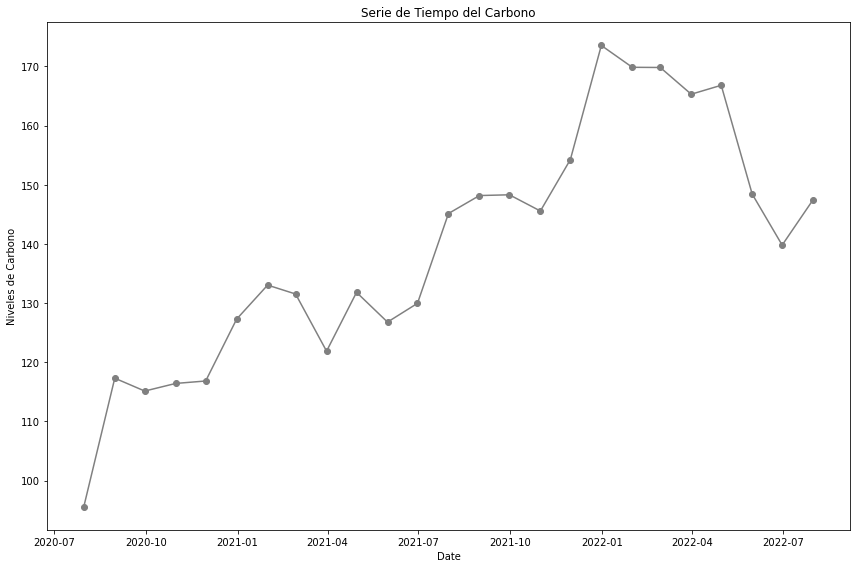

In [4]:
# Graficar la Serie de Tiempo
fig = plt.figure(figsize=(12, 8))

plt.plot(db["Close"], marker='o', color = "gray")

plt.xlabel("Date")
plt.ylabel("Niveles de Carbono")
plt.title("Serie de Tiempo del Carbono")

plt.tight_layout()

plt.show()

**¿La data es estacionaria?**: De no ser estacionaria, se debe evaluar qué orden de transformación debería de tener la serie para poder ser pronosticada através de ARIMA.

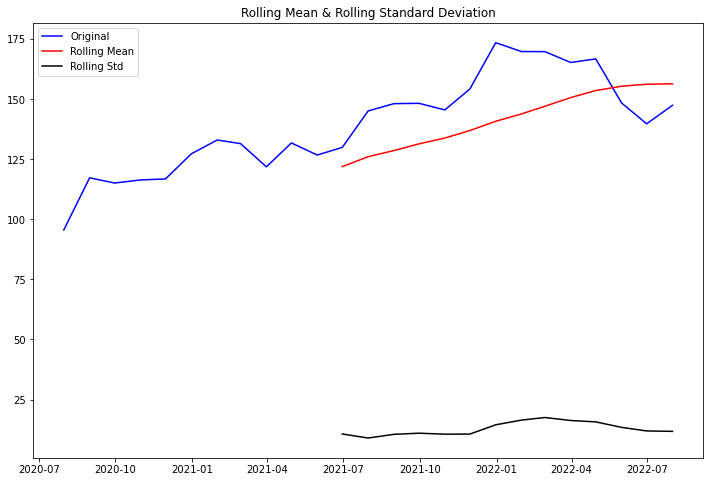

In [5]:
fig = plt.figure(figsize=(12, 8))

rolling_mean = db.rolling(window = 12).mean()
rolling_std = db.rolling(window = 12).std()

plt.plot(db, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')

plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')

plt.show()

In [6]:
# Ad Fuller metric
result = adfuller(db['Close'])

print("------------------------------------------------------------")
print('ADF Statistic: {}'.format(round(result[0],3)))
print('p-value: {}'.format(round(result[1],3)))
print("------------------------------------------------------------")

print('Critical Values:')

for key, value in result[4].items():
    print('\t{}: {}'.format(key, round(value,3)))

print("------------------------------------------------------------")

if round(result[1],3) < 0.05:
    print("Se rechaza la H0, por lo tanto es una serie Estacionaria.")
else:
    print("No se rechanza la H0, por lo tanto es una serie No Estacionaria.")

------------------------------------------------------------
ADF Statistic: -2.318
p-value: 0.166
------------------------------------------------------------
Critical Values:
	1%: -3.738
	5%: -2.992
	10%: -2.636
------------------------------------------------------------
No se rechanza la H0, por lo tanto es una serie No Estacionaria.


### Modelo ARIMA:

**¿Es estacionaria la serie? Si no, ¿a qué órden?**

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

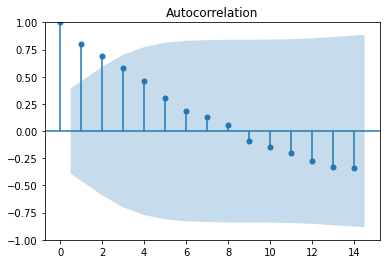

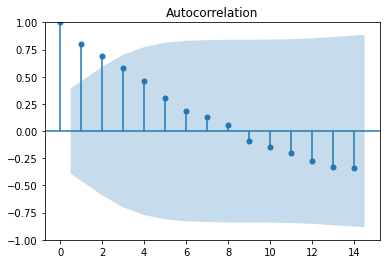

In [8]:
# Aún no está en condiciones
plot_acf(db['Close'])

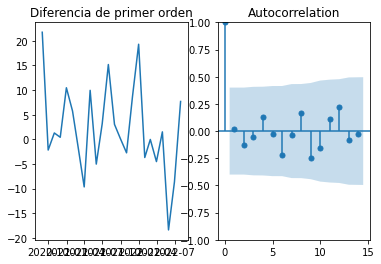

In [9]:
f = plt.figure()

ax1 = f.add_subplot(121)
ax1.set_title('Diferencia de primer orden')
ax1.plot(db['Close'].diff())

ax2 = f.add_subplot(122)
plot_acf(db['Close'].diff().dropna(), ax=ax2)
plt.show()

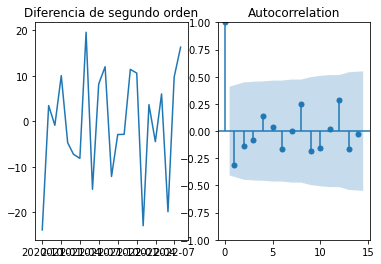

In [10]:
f = plt.figure()

ax1 = f.add_subplot(121)
ax1.set_title('Diferencia de segundo orden')
ax1.plot(db['Close'].diff().diff())

ax2 = f.add_subplot(122)
plot_acf(db['Close'].diff().diff().dropna(), ax=ax2)
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller

result_1 = adfuller(db.Close.dropna())
print('p-value 1°Orden: ', round(result_1[1],3))

result_2 = adfuller(db.Close.diff().dropna())
print('p-value 2°Orden: ', round(result_2[1],3))

result_3 = adfuller(db.Close.diff().diff().dropna())
print('p-value 3°Orden: ', round(result_3[1],3))

print('==========================')

if round(result_1[1],3) < .05:
    print('Estacionaria en 1°Orden')
else:
    print('Estacionaria en orden mayor')

p-value 1°Orden:  0.166
p-value 2°Orden:  0.0
p-value 3°Orden:  0.0
Estacionaria en orden mayor


**Entrenando el modelo ARIMA**

In [44]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(db.Close, order=(0,2,1))
model = arima_model.fit()

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   25
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 -85.178
Date:                Fri, 22 Jul 2022   AIC                            174.356
Time:                        18:09:47   BIC                            176.627
Sample:                    07-31-2020   HQIC                           174.927
                         - 07-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9070      0.199     -4.557      0.000      -1.297      -0.517
sigma2        89.4797     30.255      2.958      0.003      30.181     148.778
Ljung-Box (L1) (Q):                   0.03   Jarque-

**Nota**: Se establecieron los parámetros de ARIMA considerando combinaciones que minimizaran el criterio de AIC (entre más baja la métrica, mejor).

**Prediciendo t+n**:

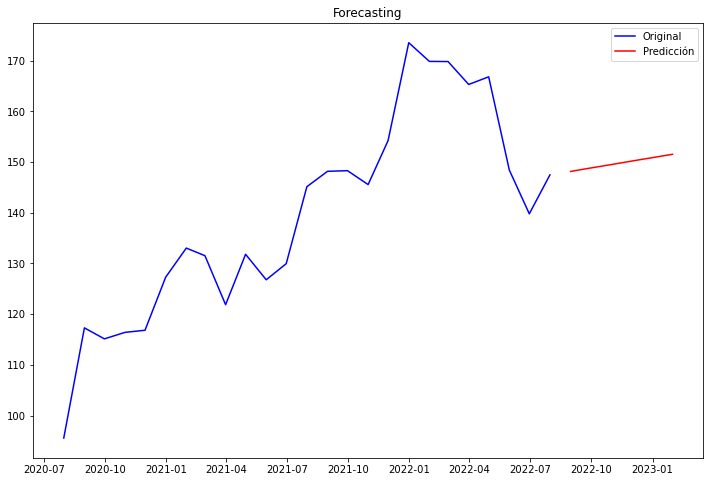

In [47]:
fig = plt.figure(figsize=(12, 8))

next_months = pd.DataFrame(model.forecast(6))

plt.plot(db, color = 'blue', label = 'Original')
plt.plot(next_months, color = 'red', label = 'Predicción')

plt.legend(loc = 'best')
plt.title('Forecasting')

plt.show()

In [48]:
# Predicción
next_months

,predicted_mean
2022-08-31,148.156528
2022-09-30,148.832390
2022-10-31,149.508252
2022-11-30,150.184113
2022-12-31,150.859975
2023-01-31,151.535837


### Evaluando el desempeño del modelo:

**Nota:** Un nivel por debajo del 15% de mape es recomendable para usar modelo, ello debido a que su nivel de error es bajo.

In [ ]:
arima_model = ARIMA(db.Close, order=(0,2,1))
model = arima_model.fit()

print(model.summary())

In [37]:
y_pred = pd.Series(model.forecast(20)[0], index = db.Close[20:].index)
y_true = db.Close[20:]

#print(np.array(y_pred).astype(np.uint8))
#print(np.array(y_true))

mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true)) # Mean Absolute Percentage Error

print("MAPE: ", str(round(mape,2)*100)+'%')

MAPE:  6.0%
